## Description

**Forest Cover Type Prediction**
This dataset describes the kind of tree cover. The actual forest cover type for a given 30 x 30-meter cell was determined and independent variables were then derived from data obtained from the US Geological Survey and USFS. The data is in raw form (not scaled) and contains binary columns of data for qualitative variables such as wilderness areas and soil type.

**Objective**
*Predict the forest cover type*

**Guidelines**
1. Explore and prepare the data
2. Create training and testing data for the model
3. Perform supervised dimensionality reduction before applying any classifiers covered in Advance ML.
4. Test the model
5. Show or visualize the output


## Import packages and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('forest_dataset.csv')
df

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15115,15116,2607,243,23,258,7,660,170,251,214,...,0,0,0,0,0,0,0,0,0,3
15116,15117,2603,121,19,633,195,618,249,221,91,...,0,0,0,0,0,0,0,0,0,3
15117,15118,2492,134,25,365,117,335,250,220,83,...,0,0,0,0,0,0,0,0,0,3
15118,15119,2487,167,28,218,101,242,229,237,119,...,0,0,0,0,0,0,0,0,0,3


In [3]:
df.isnull().sum()

Id                                    0
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0


In [4]:
df.dtypes

Id                                    int64
Elevation                             int64
Aspect                                int64
Slope                                 int64
Horizontal_Distance_To_Hydrology      int64
Vertical_Distance_To_Hydrology        int64
Horizontal_Distance_To_Roadways       int64
Hillshade_9am                         int64
Hillshade_Noon                        int64
Hillshade_3pm                         int64
Horizontal_Distance_To_Fire_Points    int64
Wilderness_Area1                      int64
Wilderness_Area2                      int64
Wilderness_Area3                      int64
Wilderness_Area4                      int64
Soil_Type1                            int64
Soil_Type2                            int64
Soil_Type3                            int64
Soil_Type4                            int64
Soil_Type5                            int64
Soil_Type6                            int64
Soil_Type7                            int64
Soil_Type8                      

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,15120.0,7560.500000,4364.912370,1.0,3780.75,7560.5,11340.25,15120.0
Elevation,15120.0,2749.322553,417.678187,1863.0,2376.00,2752.0,3104.00,3849.0
Aspect,15120.0,156.676653,110.085801,0.0,65.00,126.0,261.00,360.0
Slope,15120.0,16.501587,8.453927,0.0,10.00,15.0,22.00,52.0
Horizontal_Distance_To_Hydrology,15120.0,227.195701,210.075296,0.0,67.00,180.0,330.00,1343.0
Vertical_Distance_To_Hydrology,15120.0,51.076521,61.239406,-146.0,5.00,32.0,79.00,554.0
Horizontal_Distance_To_Roadways,15120.0,1714.023214,1325.066358,0.0,764.00,1316.0,2270.00,6890.0
Hillshade_9am,15120.0,212.704299,30.561287,0.0,196.00,220.0,235.00,254.0
Hillshade_Noon,15120.0,218.965608,22.801966,99.0,207.00,223.0,235.00,254.0
Hillshade_3pm,15120.0,135.091997,45.895189,0.0,106.00,138.0,167.00,248.0


In [6]:
df['Cover_Type'].value_counts()

7    2160
6    2160
5    2160
4    2160
3    2160
2    2160
1    2160
Name: Cover_Type, dtype: int64

In [7]:
#values close to 0 = less skew but may soil types show large skew.
df.skew()

Id                                      0.000000
Elevation                               0.075640
Aspect                                  0.450935
Slope                                   0.523658
Horizontal_Distance_To_Hydrology        1.488052
Vertical_Distance_To_Hydrology          1.537776
Horizontal_Distance_To_Roadways         1.247811
Hillshade_9am                          -1.093681
Hillshade_Noon                         -0.953232
Hillshade_3pm                          -0.340827
Horizontal_Distance_To_Fire_Points      1.617099
Wilderness_Area1                        1.231244
Wilderness_Area2                        5.228781
Wilderness_Area3                        0.324594
Wilderness_Area4                        0.825798
Soil_Type1                              6.294716
Soil_Type2                              4.617019
Soil_Type3                              3.575995
Soil_Type4                              3.872721
Soil_Type5                              9.416209
Soil_Type6          

In [8]:

#sets the number of features considered
size = 10 

#create a dataframe with only 'size' features
data=df.iloc[:,:size] 

#get the names of all the columns
cols=data.columns 

# Calculates pearson co-efficient for all combinations
data_corr = data.corr()

# Set the threshold to select only only highly correlated attributes
threshold = 0.5

# List of pairs along with correlation above threshold
corr_list = []

#Search for the highly correlated pairs
for i in range(0,size): #for 'size' features
    for j in range(i+1,size): #avoid repetition
        if (data_corr.iloc[i,j] >= threshold and data_corr.iloc[i,j] < 1) or (data_corr.iloc[i,j] < 0 and data_corr.iloc[i,j] <= -threshold):
            corr_list.append([data_corr.iloc[i,j],i,j]) #store correlation and columns index

#Sort to show higher ones first            
s_corr_list = sorted(corr_list,key=lambda x: -abs(x[0]))

#Print correlations and column names
for v,i,j in s_corr_list:
    print ("%s and %s = %.2f" % (cols[i],cols[j],v))

# Strong correlation is observed between the following pairs
# This represents an opportunity to reduce the feature set through transformations such as PCA

Hillshade_9am and Hillshade_3pm = -0.78
Horizontal_Distance_To_Hydrology and Vertical_Distance_To_Hydrology = 0.65
Aspect and Hillshade_3pm = 0.64
Hillshade_Noon and Hillshade_3pm = 0.61
Slope and Hillshade_Noon = -0.61
Aspect and Hillshade_9am = -0.59
Elevation and Horizontal_Distance_To_Roadways = 0.58


In [9]:
s_corr_list

[[-0.779964742447544, 7, 9],
 [0.6521424712357364, 4, 5],
 [0.635022364019874, 2, 9],
 [0.6145263872475779, 8, 9],
 [-0.6126128724172692, 3, 8],
 [-0.5939974281313112, 2, 7],
 [0.5786589907340067, 1, 6]]

/Users/niharika/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


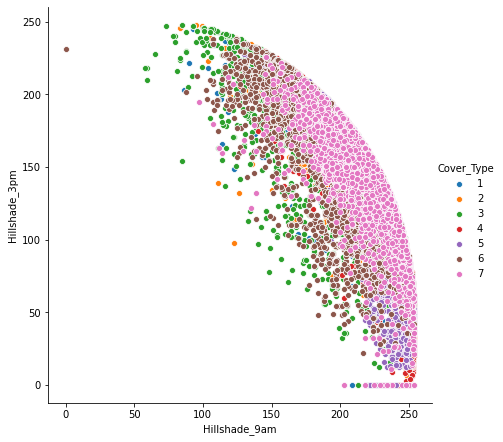

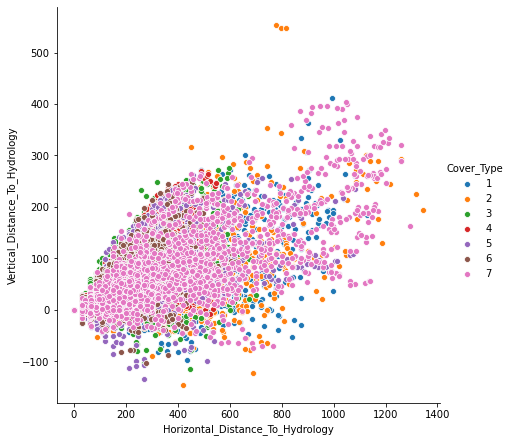

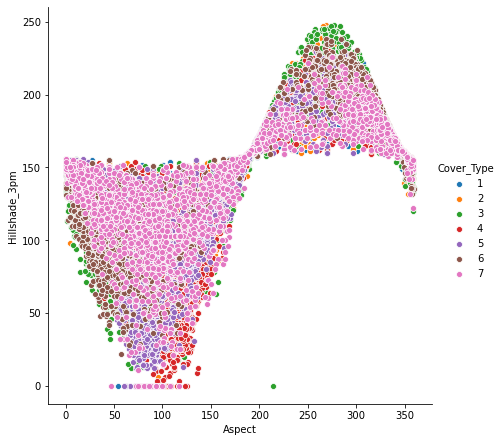

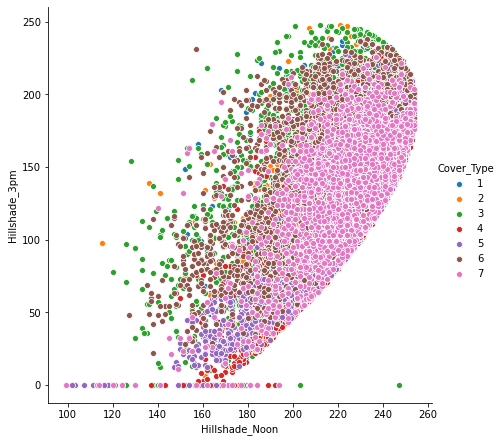

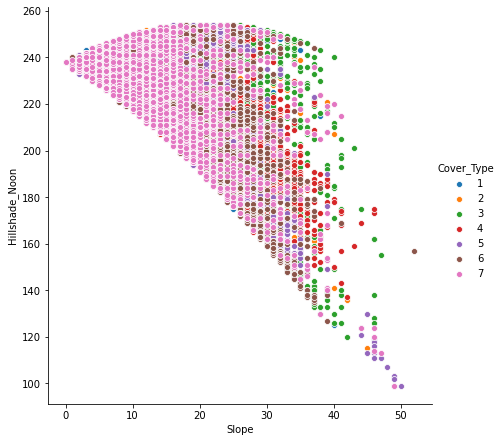

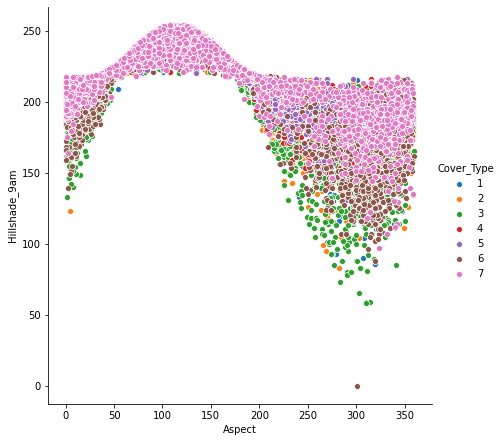

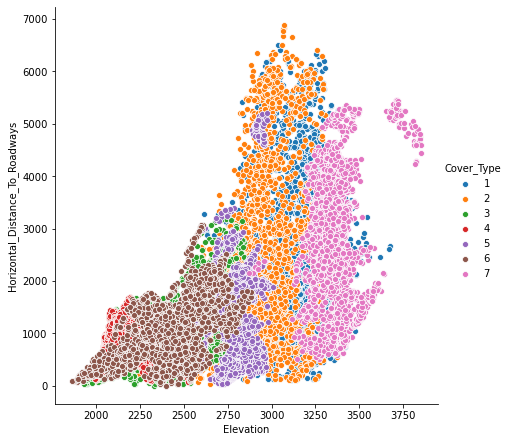

In [10]:
# Scatter plot of only the highly correlated pairs
for v,i,j in s_corr_list:
    sns.pairplot(df, hue="Cover_Type", size=6, x_vars=cols[i],y_vars=cols[j] )
    plt.show()

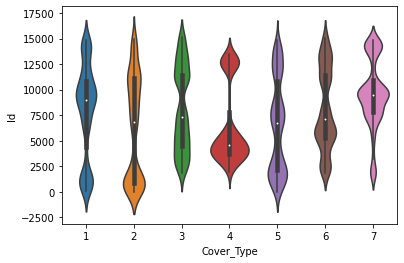

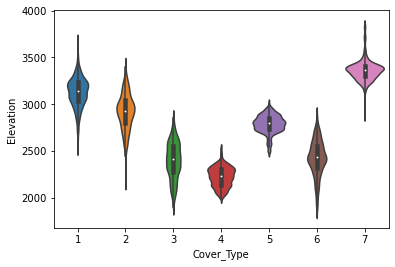

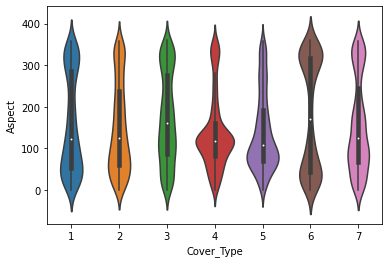

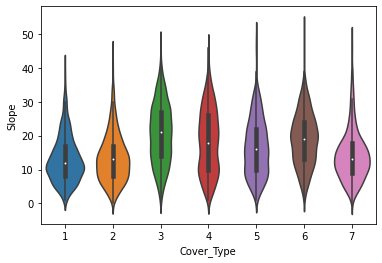

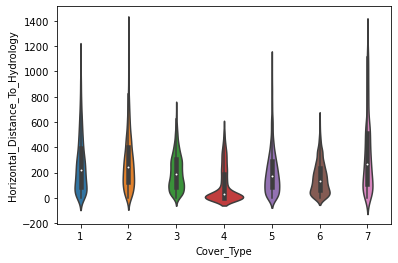

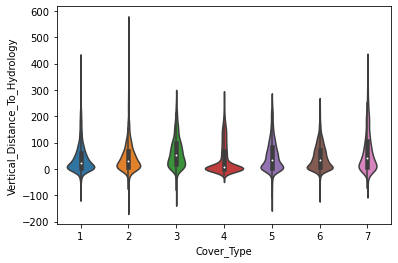

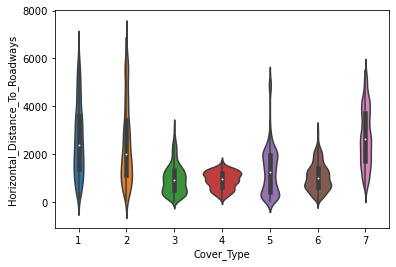

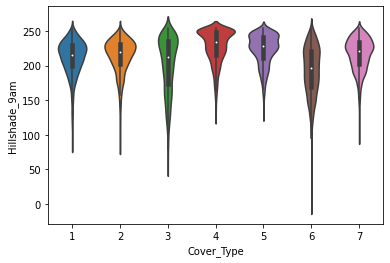

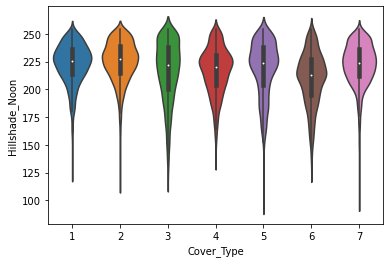

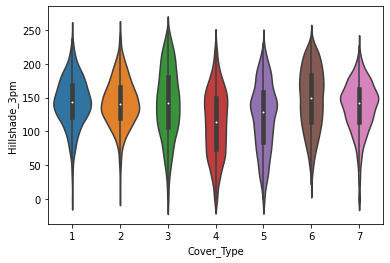

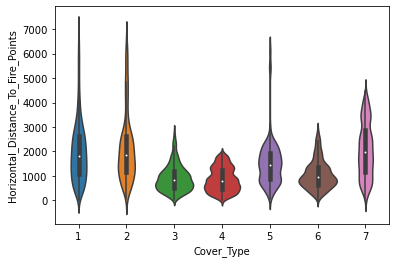

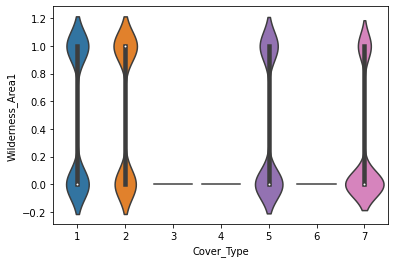

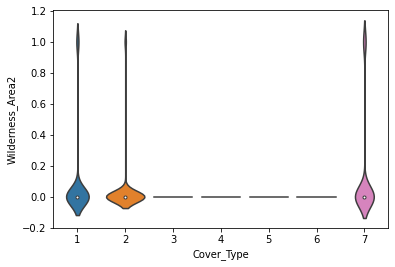

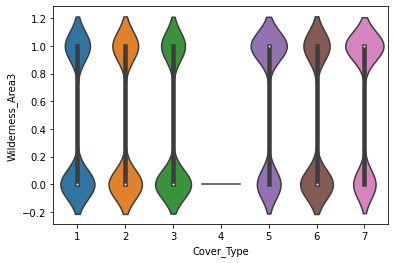

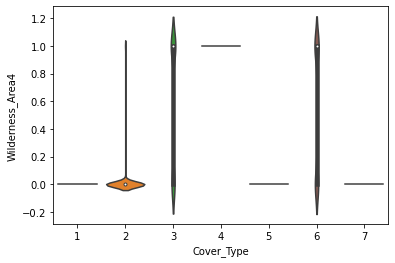

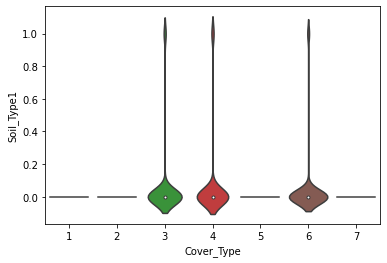

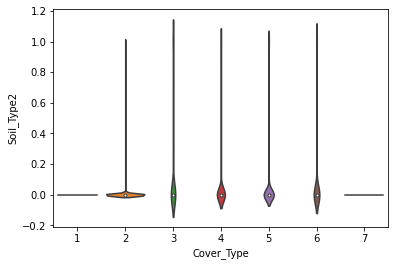

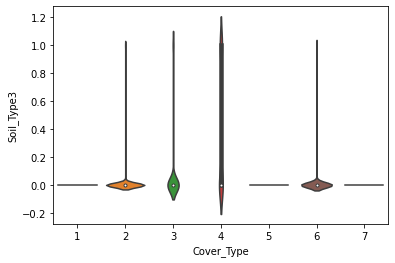

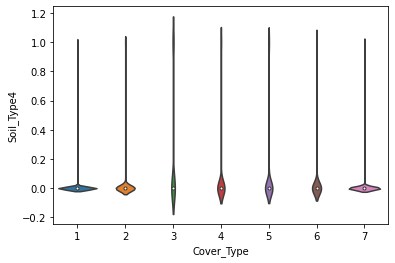

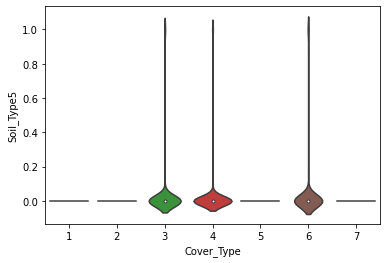

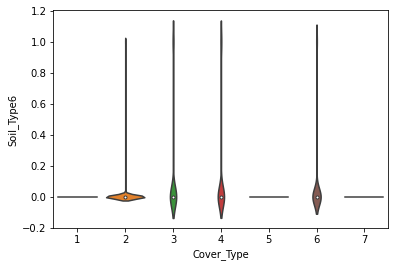

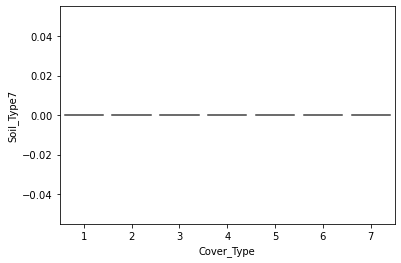

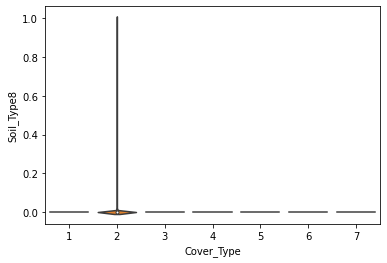

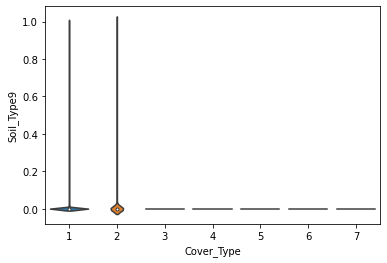

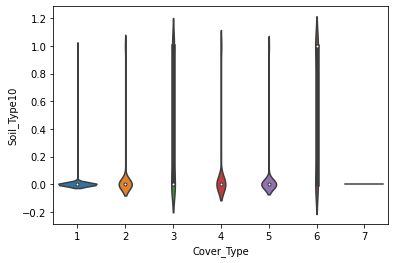

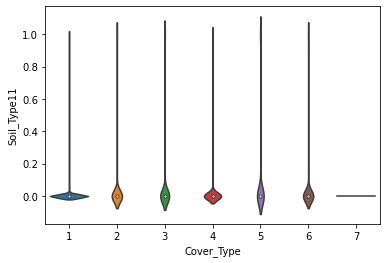

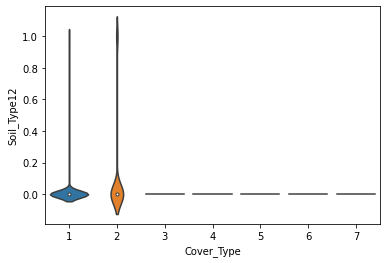

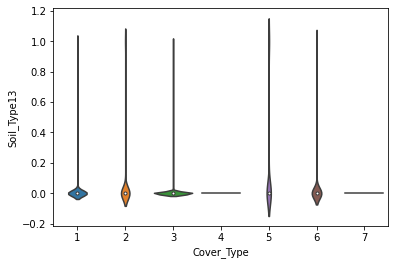

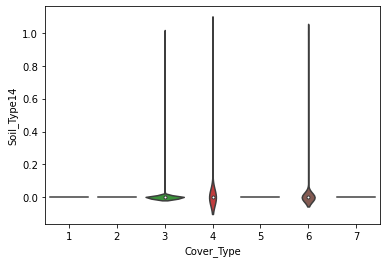

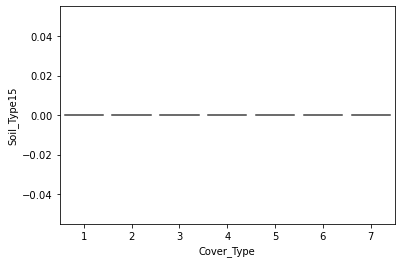

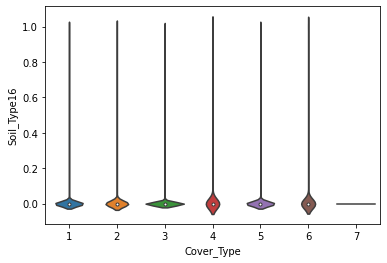

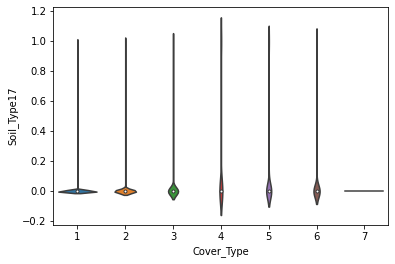

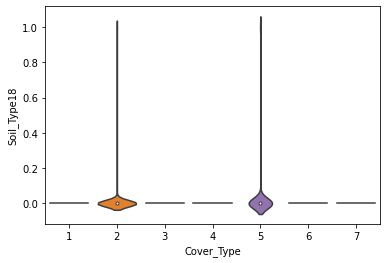

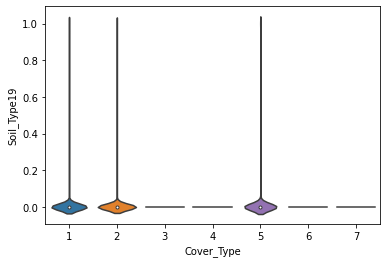

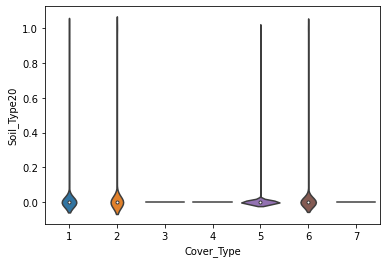

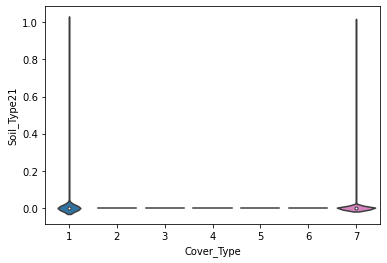

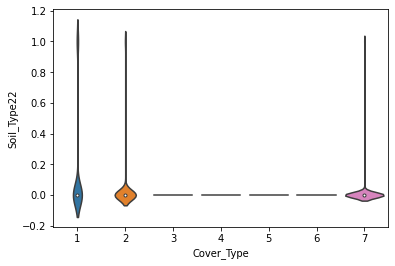

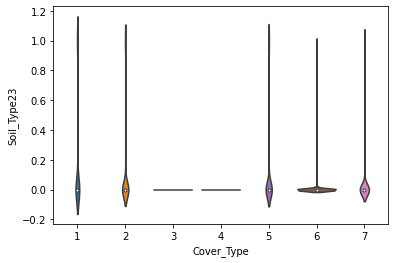

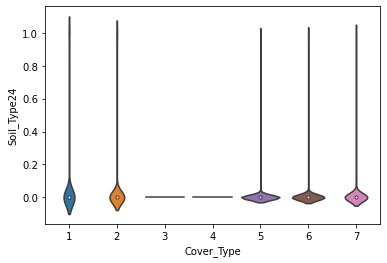

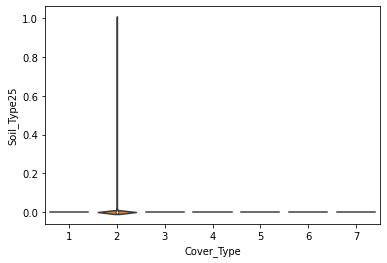

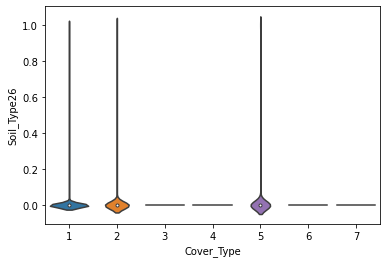

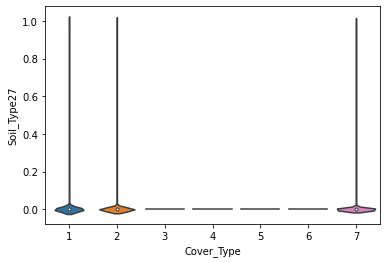

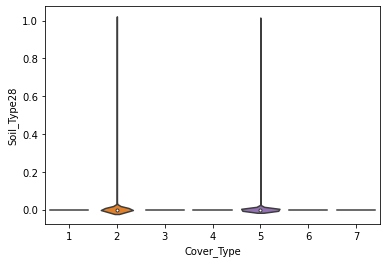

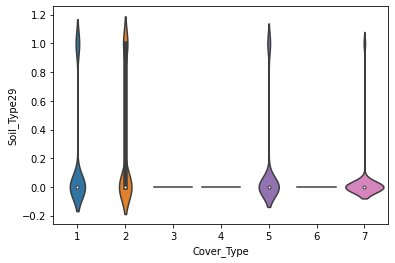

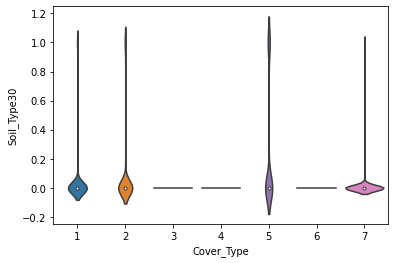

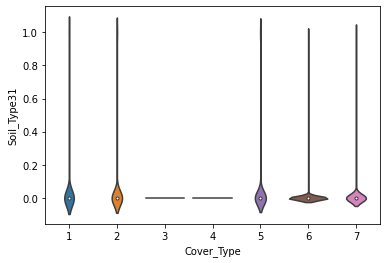

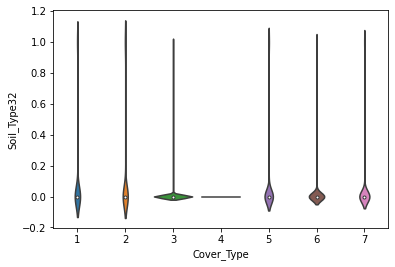

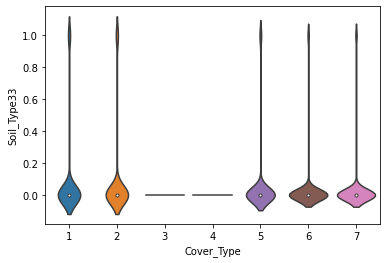

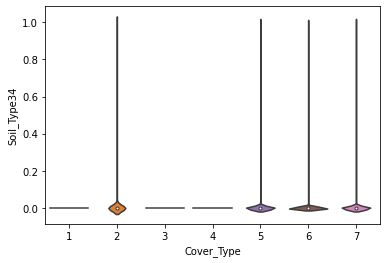

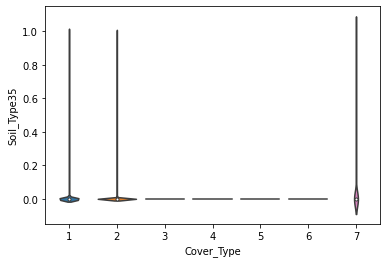

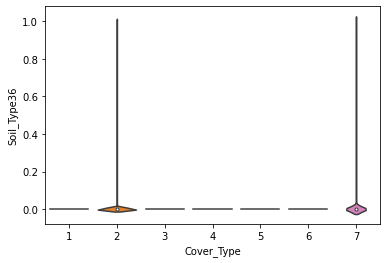

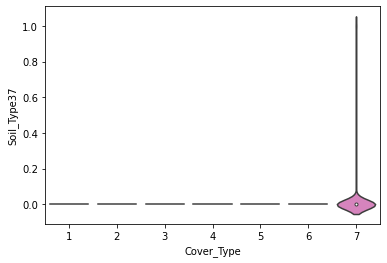

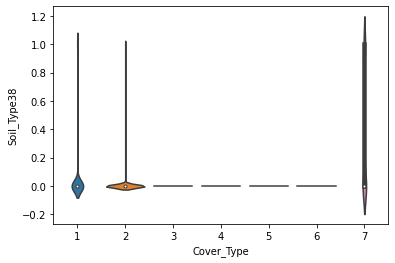

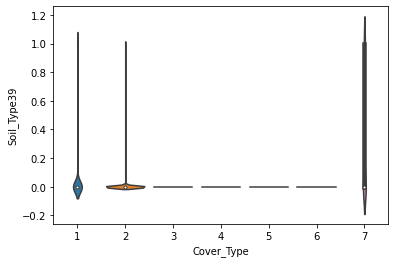

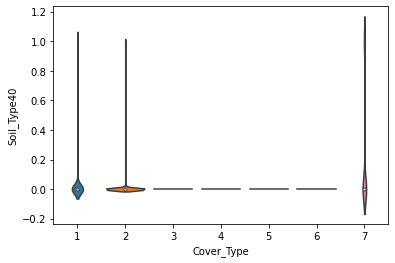

In [11]:
cols = df.columns

#number of attributes (exclude target)
size = len(cols)-1

#x-axis has target attribute to distinguish between classes
x = cols[size]

#y-axis shows values of an attribute
y = cols[0:size]

#Plot violin for all attributes
for i in range(0,size):
    sns.violinplot(data=df,x=x,y=y[i])  
    plt.show()
    
    
#Elevation is has a separate distribution for most classes. Highly correlated with the target and hence an important attribute
#Aspect contains a couple of normal distribution for several classes
#Horizontal distance to road and hydrology have similar distribution
#Hillshade 9am and 12pm display left skew
#Hillshade 3pm is normal
#Lots of 0s in vertical distance to hydrology
#Wilderness_Area3 gives no class distinction. As values are not present, others gives some scope to distinguish
#Soil_Type, 1,5,8,9,12,14,18-22, 25-30 and 35-40 offer class distinction as values are not present for many classes


In [12]:
df.columns

Index(['Id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_

<ipython-input-13-13f7129b695b>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('Cover_Type')['Wilderness_Area1','Wilderness_Area2','Wilderness_Area3','Wilderness_Area4'].sum().plot(kind='bar')


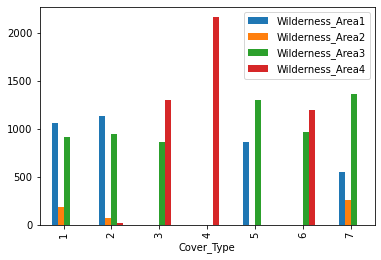

In [13]:
df.groupby('Cover_Type')['Wilderness_Area1','Wilderness_Area2','Wilderness_Area3','Wilderness_Area4'].sum().plot(kind='bar')

<ipython-input-14-ca50174aecec>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('Cover_Type')['Soil_Type1', 'Soil_Type2', 'Soil_Type3',


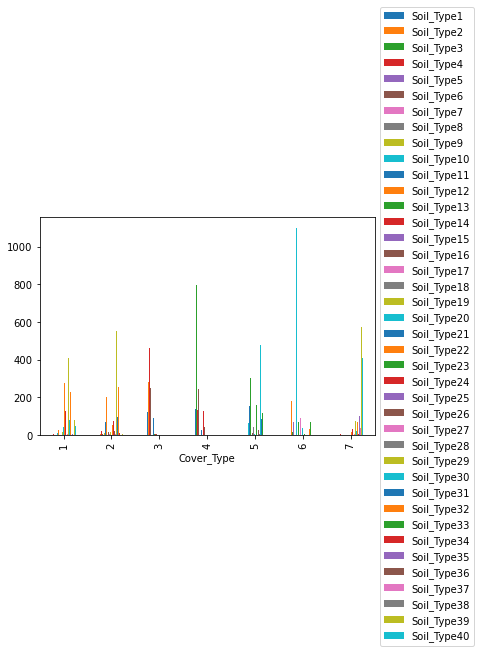

In [14]:
df.groupby('Cover_Type')['Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40'].sum().plot(kind='bar')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [15]:
#import plotly.express as px

#fig = px.bar(df, x="Cover_Type", y=['Soil_Type1', 'Soil_Type2', 'Soil_Type3',
#       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
#       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
#       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
#       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
#       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
#       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
# 'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
#       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
#       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40'], title="Wide-Form Input")
#fig.show()

In [16]:
rem = []

#Add constant columns as they don't help in prediction process
for c in df.columns:
    if df[c].std() == 0: #standard deviation is zero
        rem.append(c)

#drop the columns        
df.drop(rem,axis=1,inplace=True)

print(rem)

['Soil_Type7', 'Soil_Type15']


In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# transform data
scaled = scaler.fit_transform(df.drop(columns=['Cover_Type']))
dataset = pd.DataFrame(scaled)

In [18]:
dataset= pd.concat([dataset,df['Cover_Type']],axis=1)
dataset.columns

Index([           0,            1,            2,            3,            4,
                  5,            6,            7,            8,            9,
                 10,           11,           12,           13,           14,
                 15,           16,           17,           18,           19,
                 20,           21,           22,           23,           24,
                 25,           26,           27,           28,           29,
                 30,           31,           32,           33,           34,
                 35,           36,           37,           38,           39,
                 40,           41,           42,           43,           44,
                 45,           46,           47,           48,           49,
                 50,           51,           52, 'Cover_Type'],
      dtype='object')

In [19]:
X = dataset.drop(columns=['Cover_Type'])
y = dataset['Cover_Type']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [20]:
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
#from xgboost import XGBClassifier
#from lightgbm import LGBMClassifier

# Importing other tools
from sklearn import model_selection
from sklearn.metrics import classification_report, make_scorer
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score,roc_auc_score
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.calibration import CalibratedClassifierCV

In [21]:
seed=42

# Creating Models

lr = LogisticRegression()

svc = SVC(random_state=seed, probability=True)
dtree = DecisionTreeClassifier(random_state=seed)
rf = RandomForestClassifier(10, random_state=seed)
gdb = GradientBoostingClassifier(random_state=seed)
adb = AdaBoostClassifier(random_state=seed)
#xgb = XGBClassifier(random_state=seed)
knn = KNeighborsClassifier()
#lgbm = LGBMClassifier(random_state=seed)

first_models = [ lr,  svc, dtree, 
                 rf, gdb, adb, knn]
first_model_names = ['Linear Regression','SVM','Decision Tree', 
                     'Random Forest', 'GradientBoosting',
                    'AdaBoost', 'K-Neighbors'] 
pred_col=[ 'lr', 'svc', 'dtree', 
                 'rf', 'gdb', 'adb', 'knn']

In [22]:
X_test

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
9122,0.603347,0.731118,0.338889,0.153846,0.022338,0.207143,0.252540,0.917323,0.870968,0.536290,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1614,0.106753,0.495468,0.261111,0.634615,0.156366,0.332857,0.046880,0.984252,0.477419,0.096774,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14668,0.970170,0.646022,0.780556,0.269231,0.149665,0.215714,0.017417,0.708661,0.909677,0.806452,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14338,0.948343,0.641490,0.413889,0.269231,0.509308,0.351429,0.264441,0.933071,0.903226,0.516129,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14022,0.927442,0.689829,0.355556,0.250000,0.429635,0.375714,0.403919,0.948819,0.851613,0.471774,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7066,0.467359,0.389225,0.402778,0.288462,0.022338,0.191429,0.174020,0.940945,0.890323,0.495968,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14091,0.932006,0.648540,0.086111,0.211538,0.044676,0.208571,0.251959,0.854331,0.754839,0.536290,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12671,0.838085,0.175227,0.294444,0.442308,0.111690,0.310000,0.198113,0.992126,0.683871,0.278226,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9987,0.660560,0.491944,0.769444,0.076923,0.000000,0.208571,0.201742,0.822835,0.909677,0.681452,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
from sklearn import metrics
n_folds=10
skf= model_selection.ShuffleSplit(n_splits = n_folds, test_size = 0.3, train_size = 0.7, random_state = seed )

In [24]:
model_predict=pd.DataFrame(index=X_test.index)
model_predict

""
9122
1614
14668
14338
14022
...
7066
14091
12671
9987


In [25]:
MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)

#create table to compare MLA predictions
MLA_predict = X_test.index

train_size = X.shape[0]
n_models = len(first_models)
oof_pred = np.zeros((train_size, n_models))
scores = []
row_index=0

for n, model in enumerate(first_models):
    model_pipeline = Pipeline(steps=[('Estimator', model)])
    MLA_name = model.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(model.get_params())
    
    cv_results = model_selection.cross_validate(model, X_train, y_train, cv  = skf, return_train_score=True)

    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()  
    
    model_pipeline.fit(X_train, y_train)
    model_predict[MLA_name] = model_pipeline.predict(X_test)
    row_index+=1

/Users/niharika/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/niharika/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

In [26]:
model_predict

,LogisticRegression,SVC,DecisionTreeClassifier,RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,KNeighborsClassifier
9122,7,7,7,7,7,7,7
1614,5,5,5,5,5,5,5
14668,1,1,2,2,1,1,1
14338,2,1,2,2,2,7,2
14022,1,1,2,1,1,7,1
...,...,...,...,...,...,...,...
7066,3,3,5,5,3,6,5
14091,1,1,1,1,1,1,2
12671,4,4,4,4,4,6,4
9987,5,5,5,5,5,5,1


In [31]:
MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
MLA_compare

,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Time
3,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",0.994071,0.820364,0.134752
4,GradientBoostingClassifier,"{'ccp_alpha': 0.0, 'criterion': 'friedman_mse'...",0.869706,0.80474,15.0168
2,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",1,0.770488,0.0936687
6,KNeighborsClassifier,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.832963,0.744833,0.040113
1,SVC,"{'C': 1.0, 'break_ties': False, 'cache_size': ...",0.705468,0.690383,11.8046
0,LogisticRegression,"{'C': 1.0, 'class_weight': None, 'dual': False...",0.681292,0.674649,0.377761
5,AdaBoostClassifier,"{'algorithm': 'SAMME.R', 'base_estimator': Non...",0.414787,0.416451,0.548326
